In [1]:
import SimpleITK as sitk
import numpy as np
from myshow import *

data_path = 'data/dataset_256x256.npz'

In [2]:
file = np.load(data_path)
images = file['X_train']
masks_gt = file['Y_train']
contours_gt = file['C_train']

(256, 256)


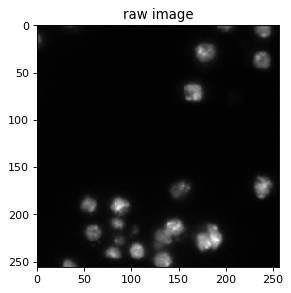

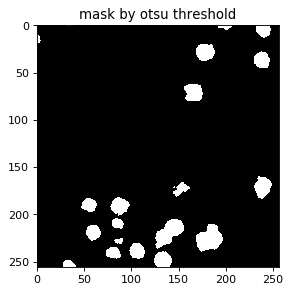

(256, 256)


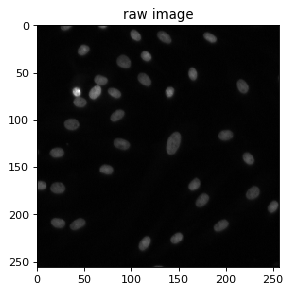

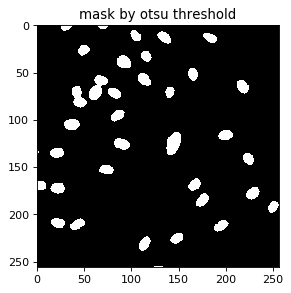

(256, 256)


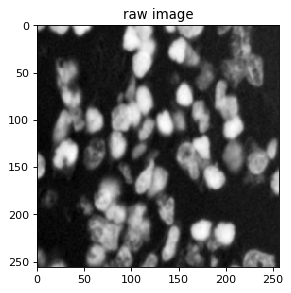

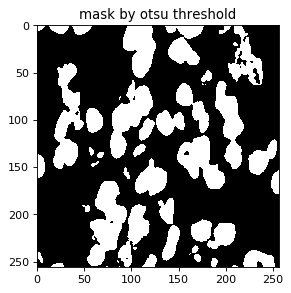

(256, 256)


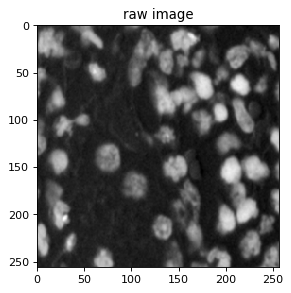

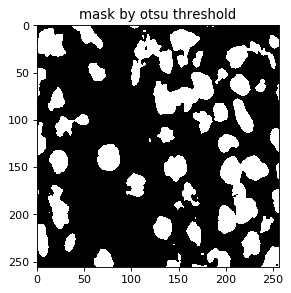

(256, 256)


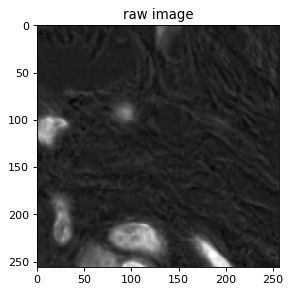

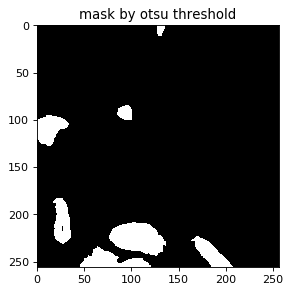

(256, 256)


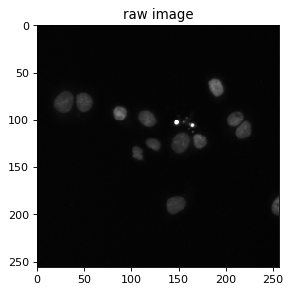

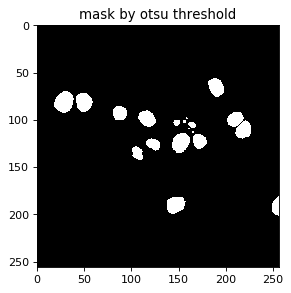

(256, 256)


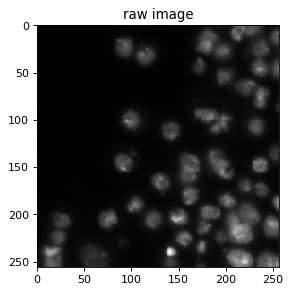

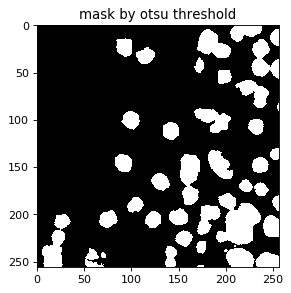

(256, 256)


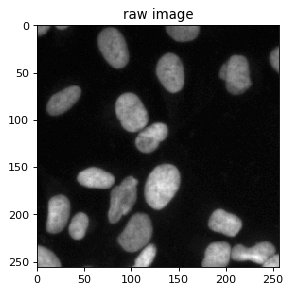

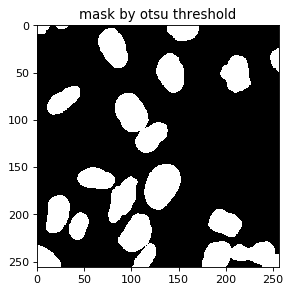

(256, 256)


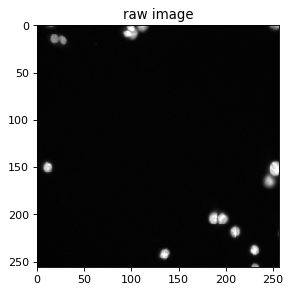

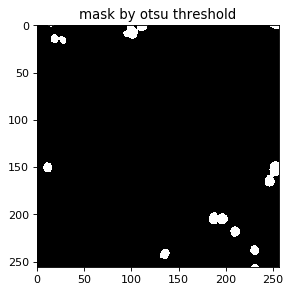

(256, 256)


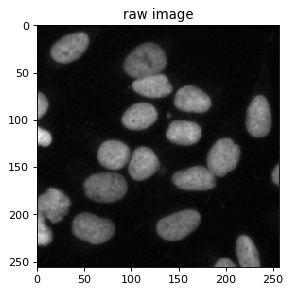

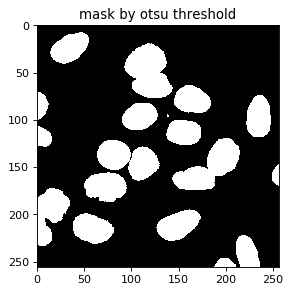

(256, 256)


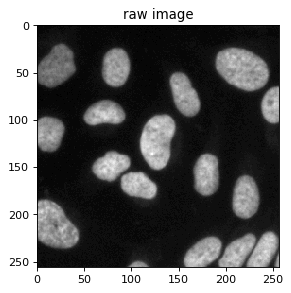

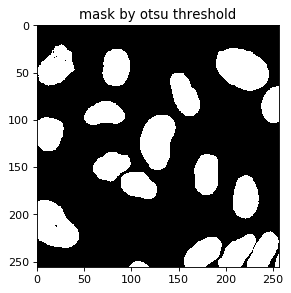

(256, 256)


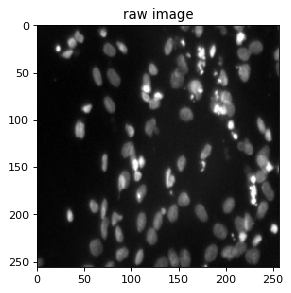

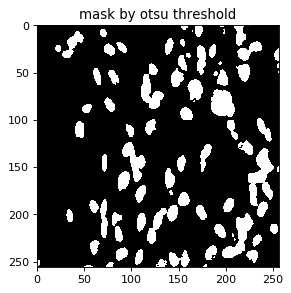

(256, 256)


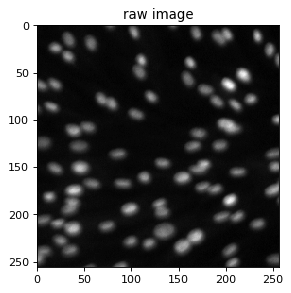

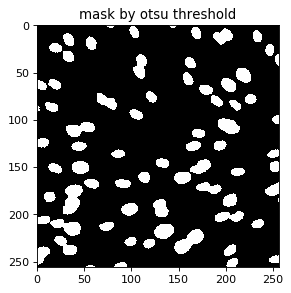

(256, 256)


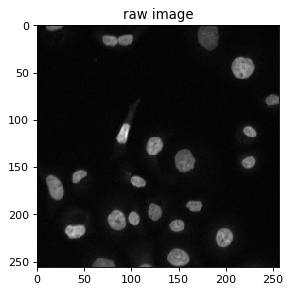

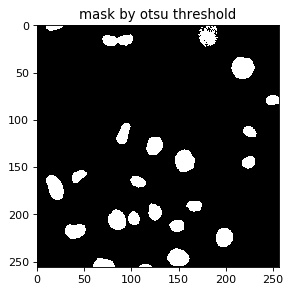

(256, 256)


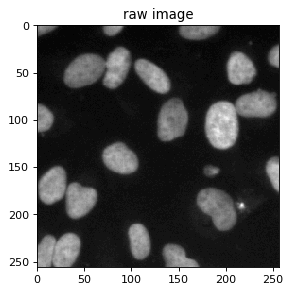

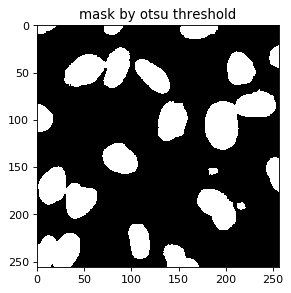

(256, 256)


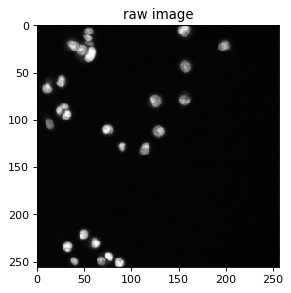

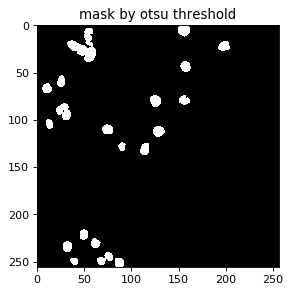

(256, 256)


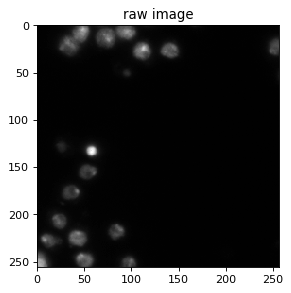

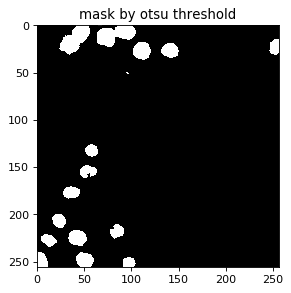

(256, 256)


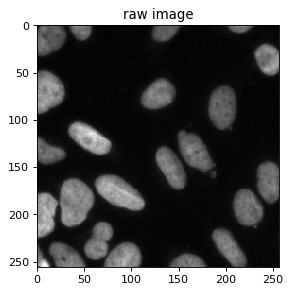

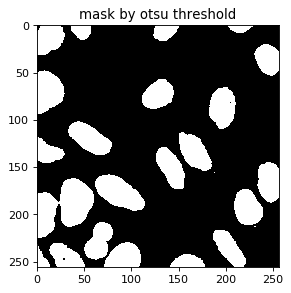

(256, 256)


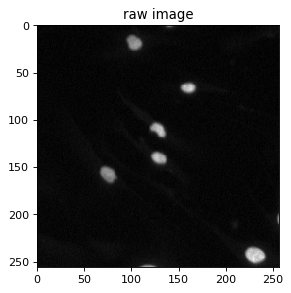

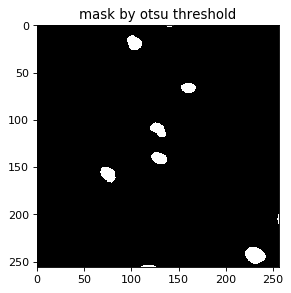

(256, 256)


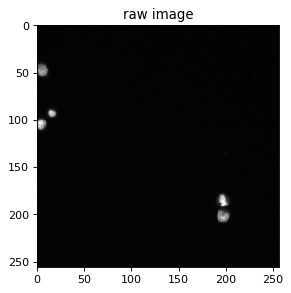

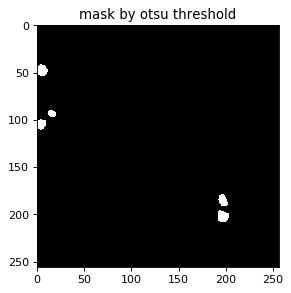

(256, 256)


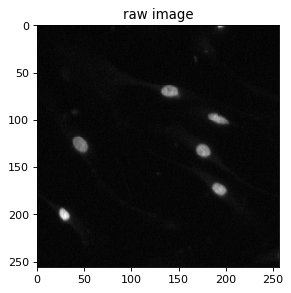

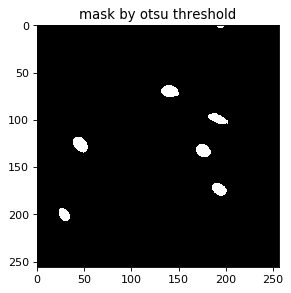

(256, 256)


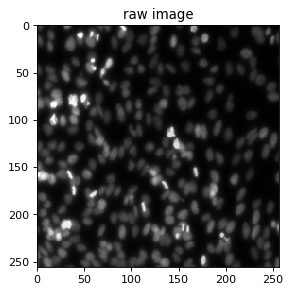

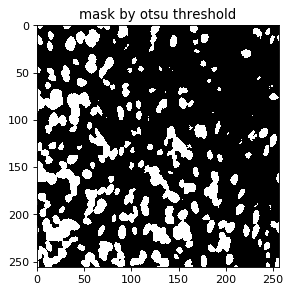

(256, 256)


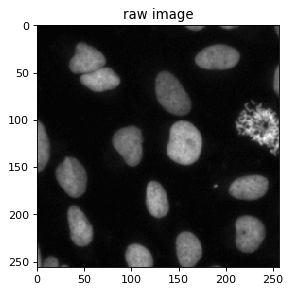

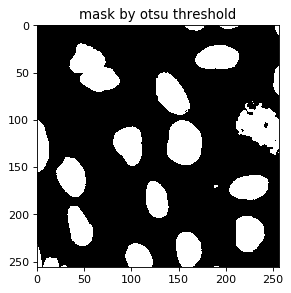

(256, 256)


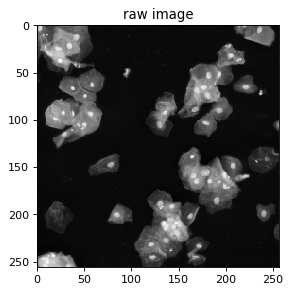

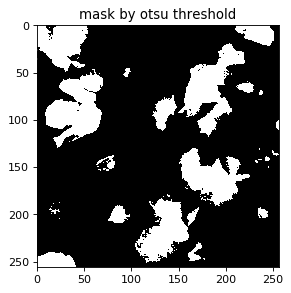

(256, 256)


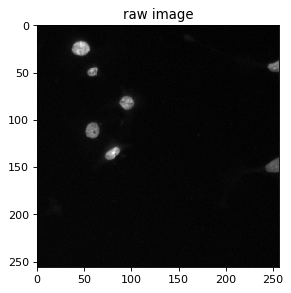

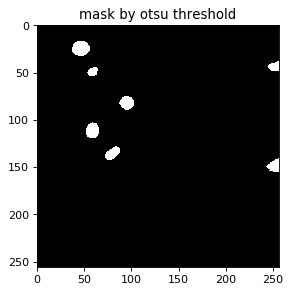

(256, 256)


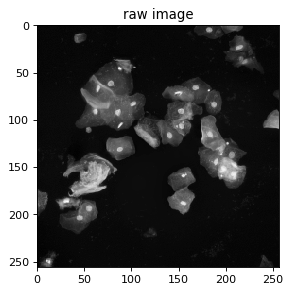

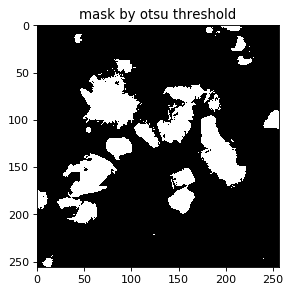

(256, 256)


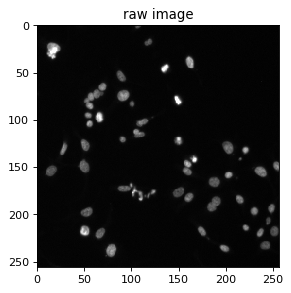

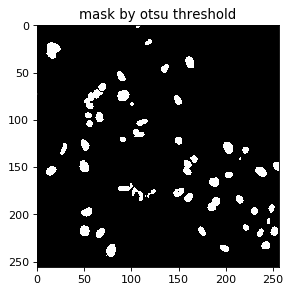

(256, 256)


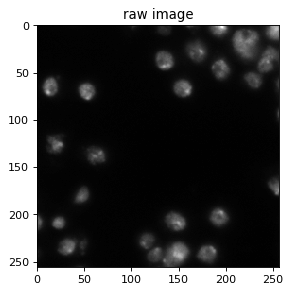

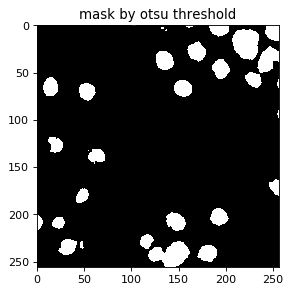

(256, 256)


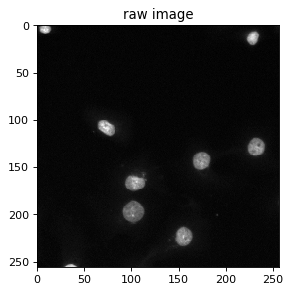

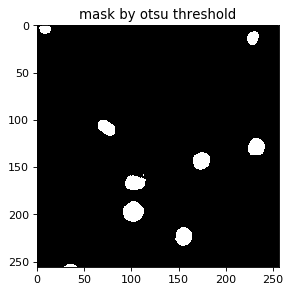

(256, 256)


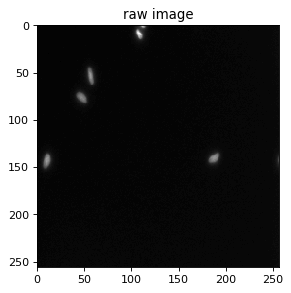

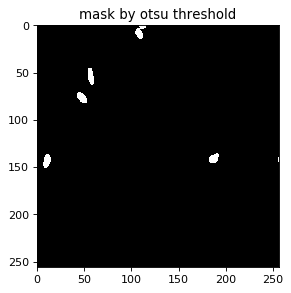

(256, 256)


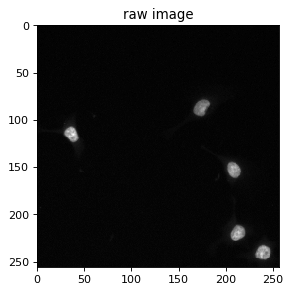

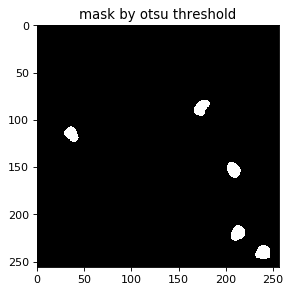

(256, 256)


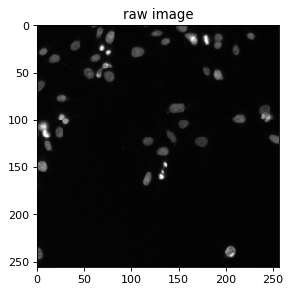

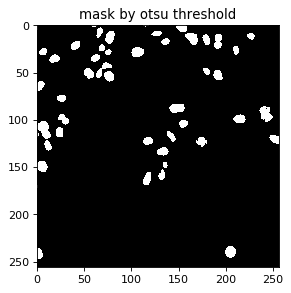

(256, 256)


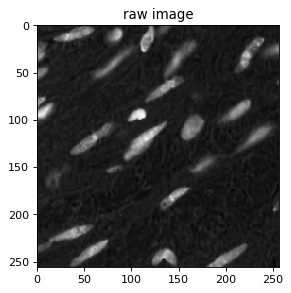

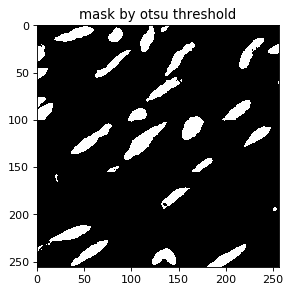

(256, 256)


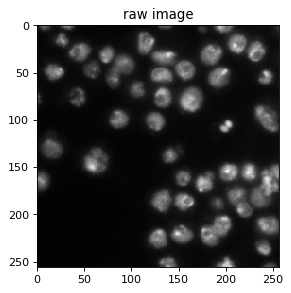

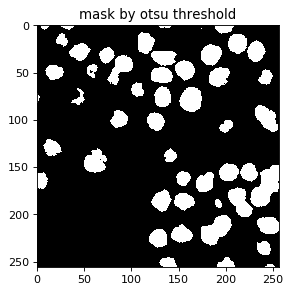

(256, 256)


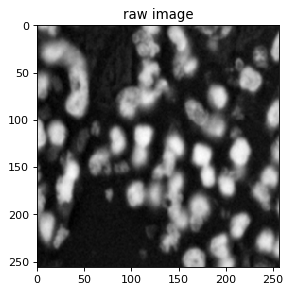

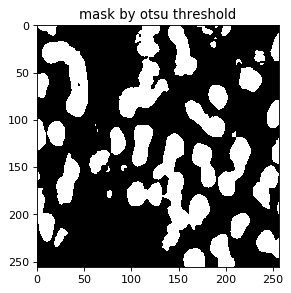

(256, 256)


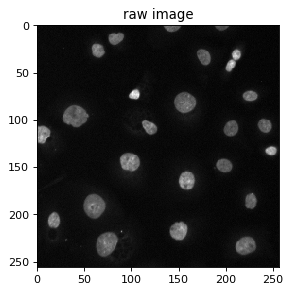

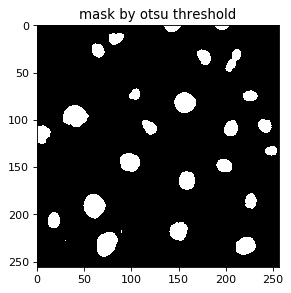

(256, 256)


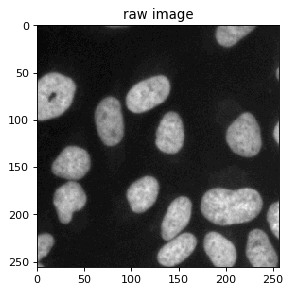

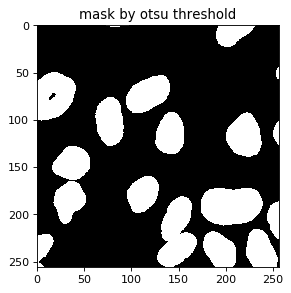

(256, 256)


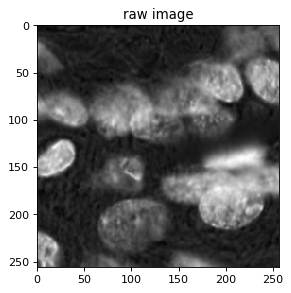

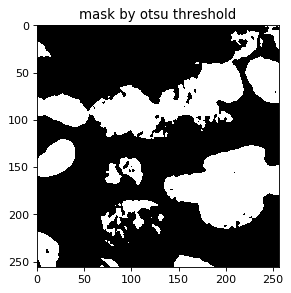

(256, 256)


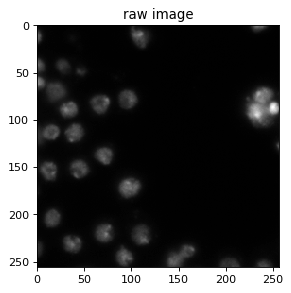

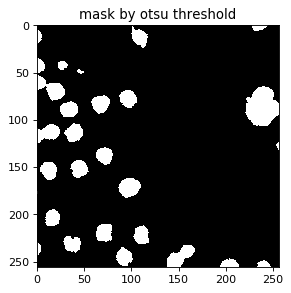

(256, 256)


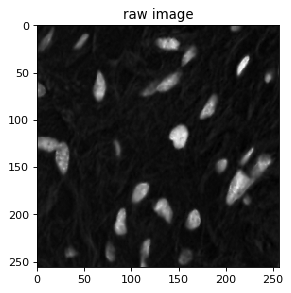

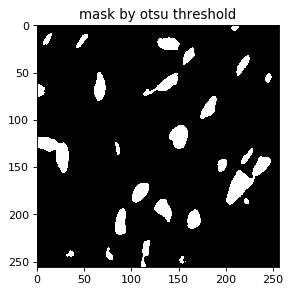

(256, 256)


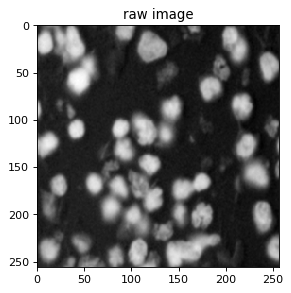

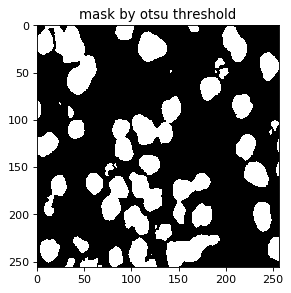

(256, 256)


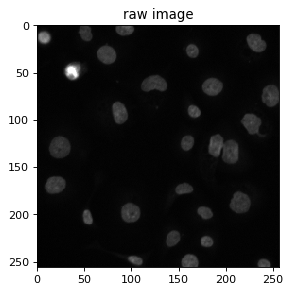

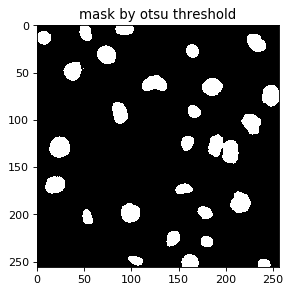

(256, 256)


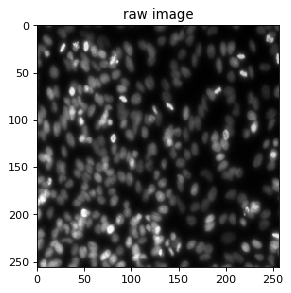

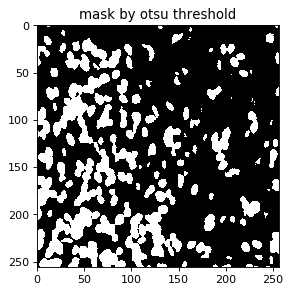

(256, 256)


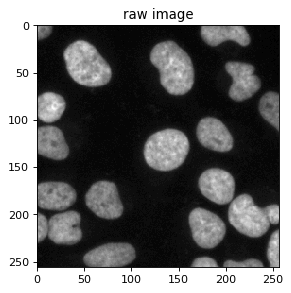

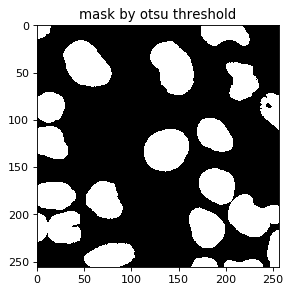

(256, 256)


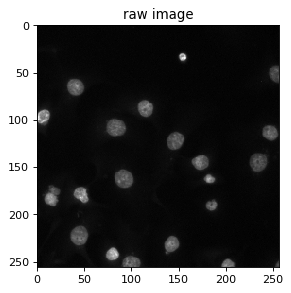

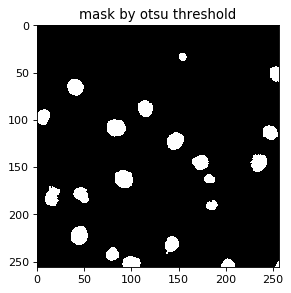

(256, 256)


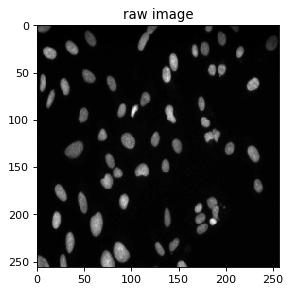

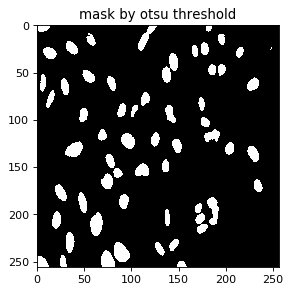

(256, 256)


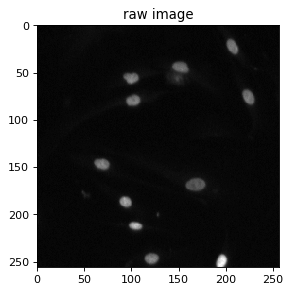

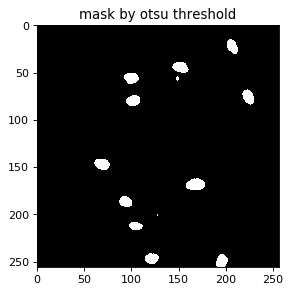

(256, 256)


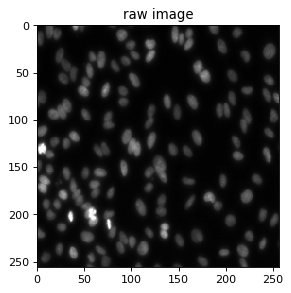

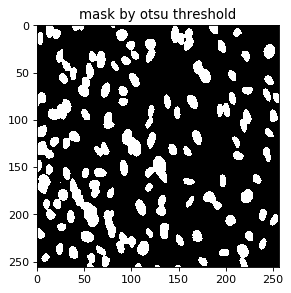

(256, 256)


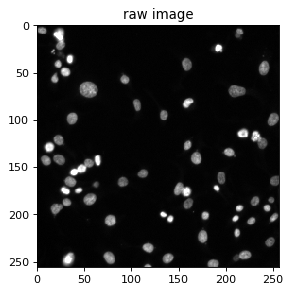

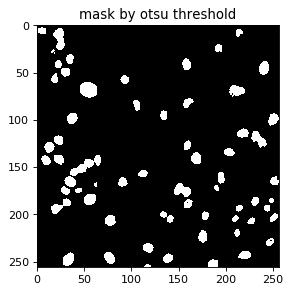

(256, 256)


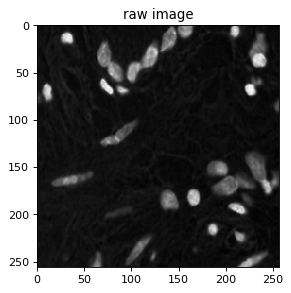

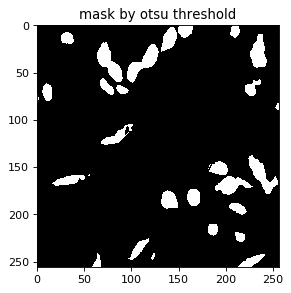

(256, 256)


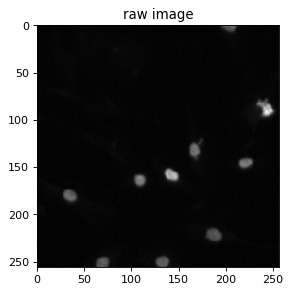

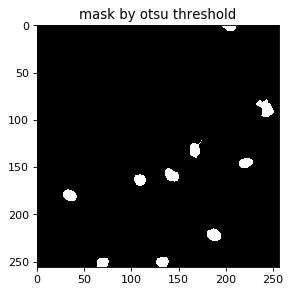

(256, 256)


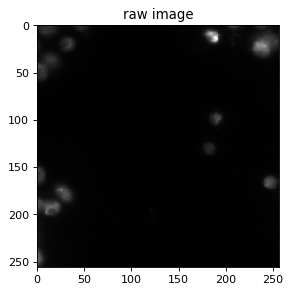

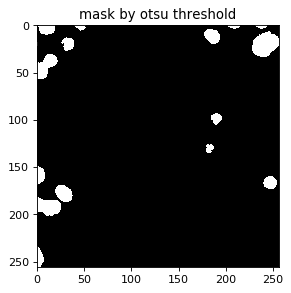

(256, 256)


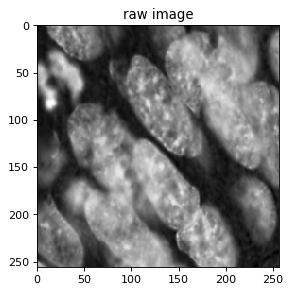

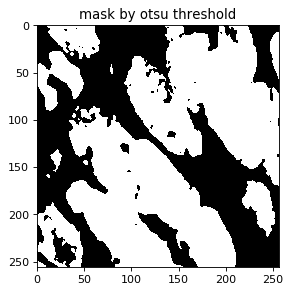

(256, 256)


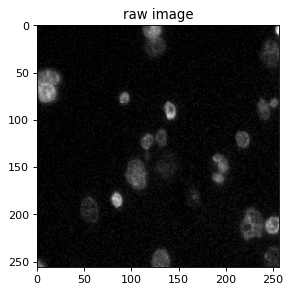

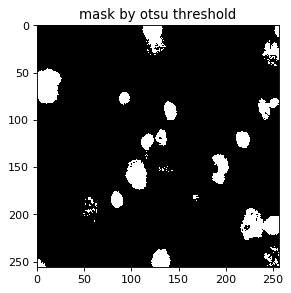

(256, 256)


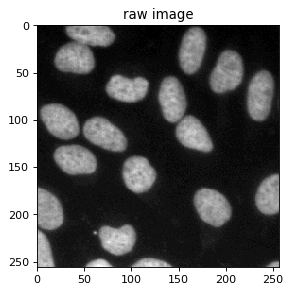

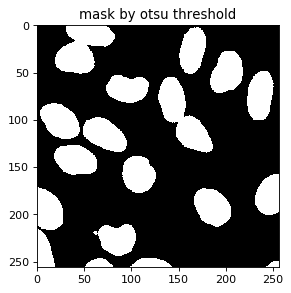

(256, 256)


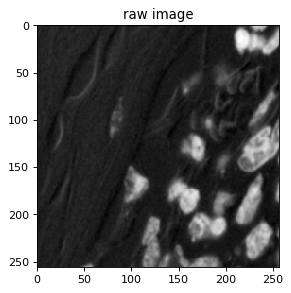

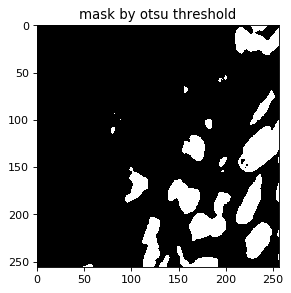

(256, 256)


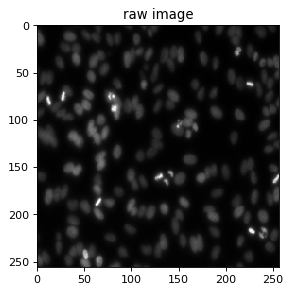

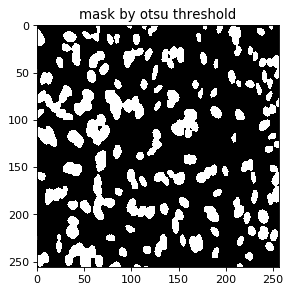

(256, 256)


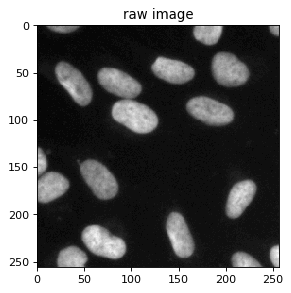

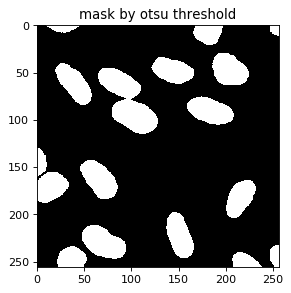

(256, 256)


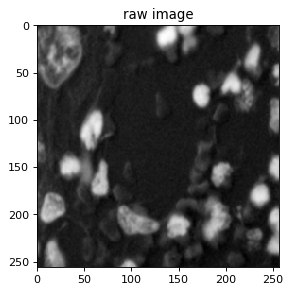

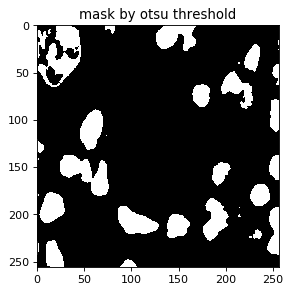

(256, 256)


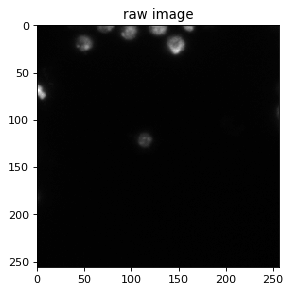

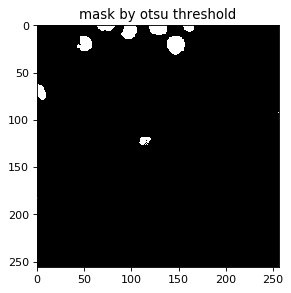

(256, 256)


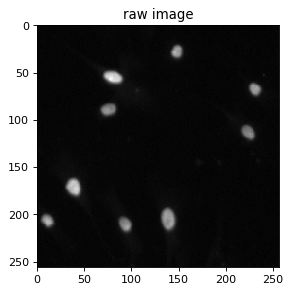

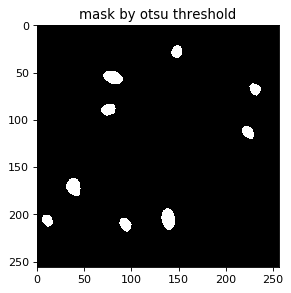

(256, 256)


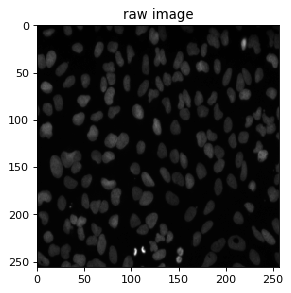

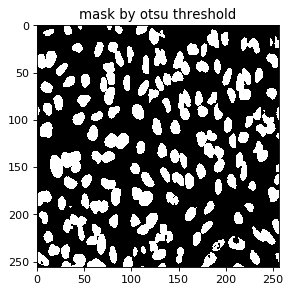

(256, 256)


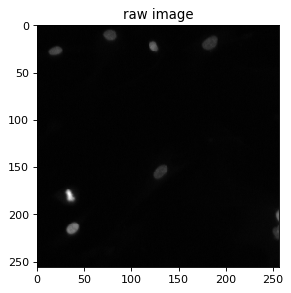

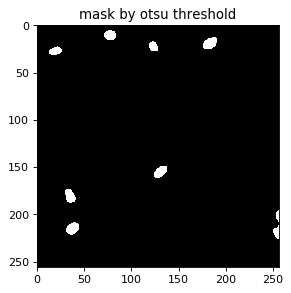

(256, 256)


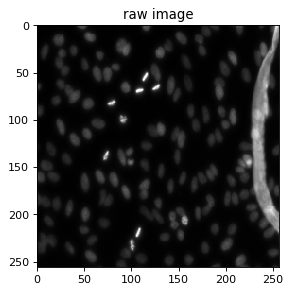

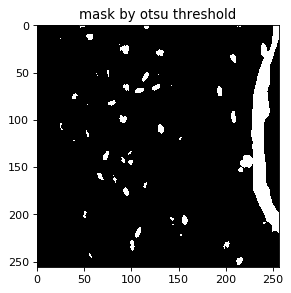

(256, 256)


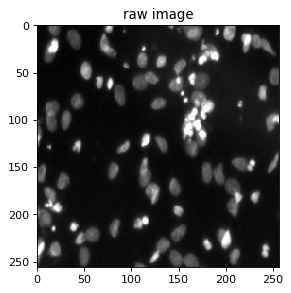

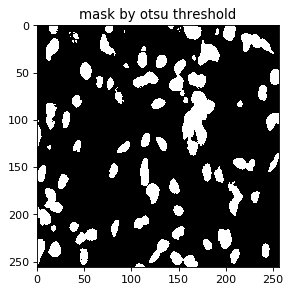

(256, 256)


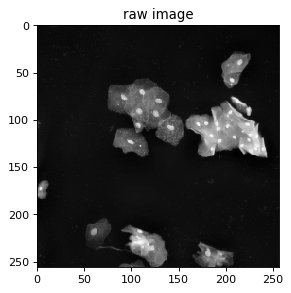

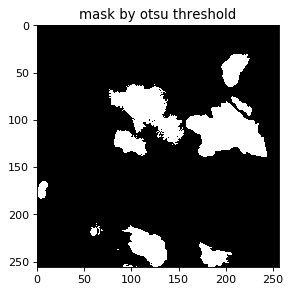

(256, 256)


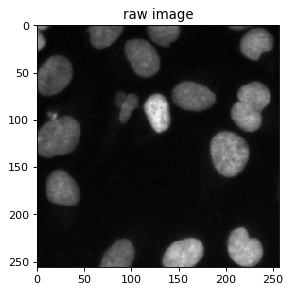

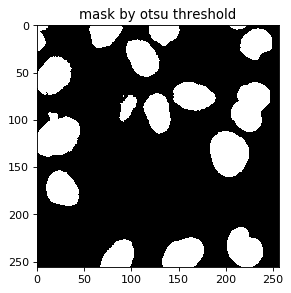

(256, 256)


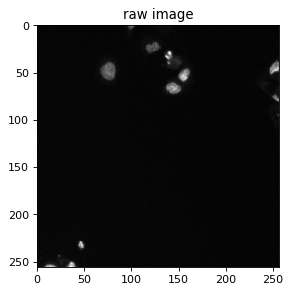

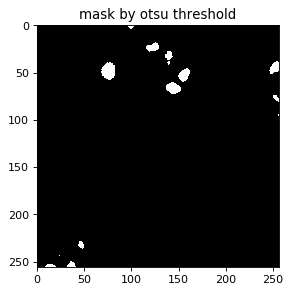

(256, 256)


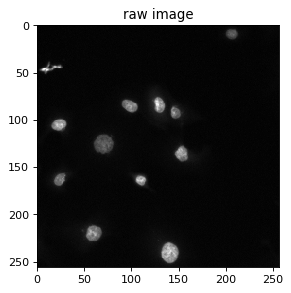

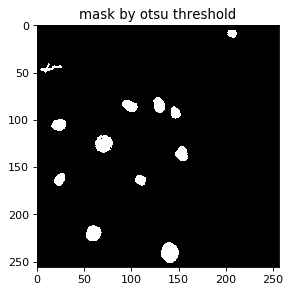

(256, 256)


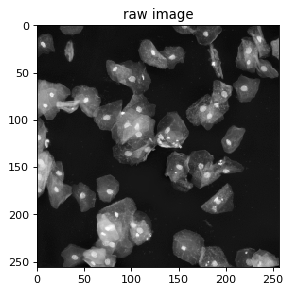

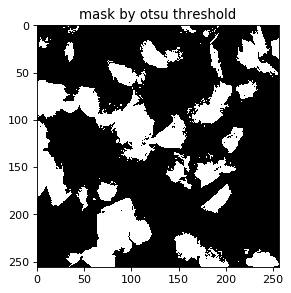

(256, 256)


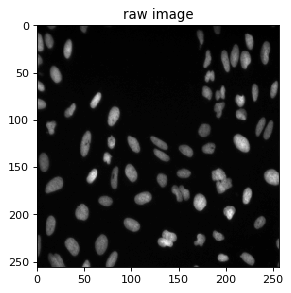

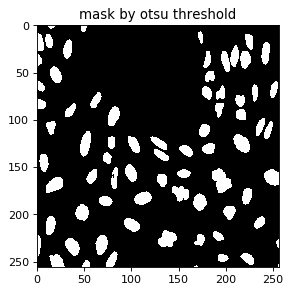

(256, 256)


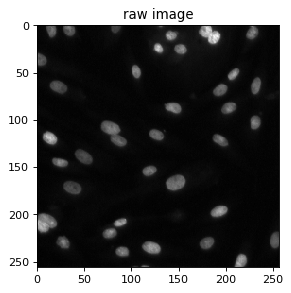

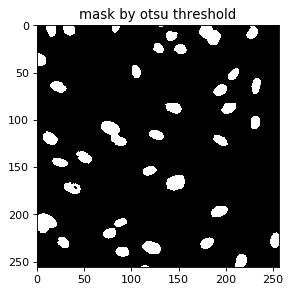

(256, 256)


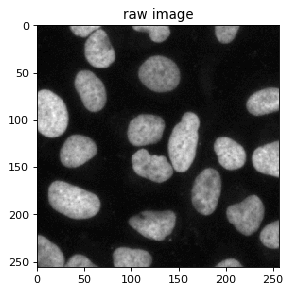

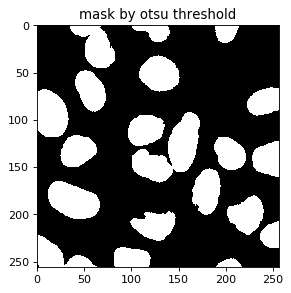

(256, 256)


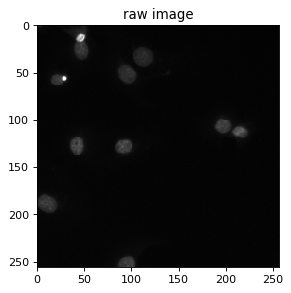

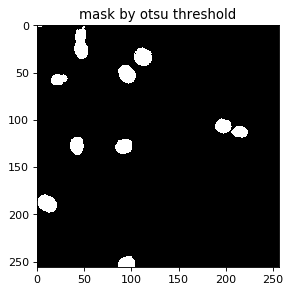

(256, 256)


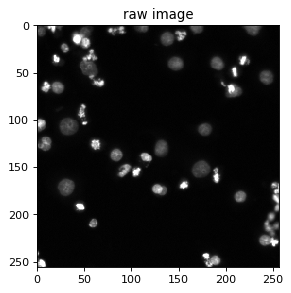

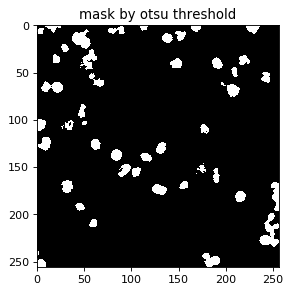

(256, 256)


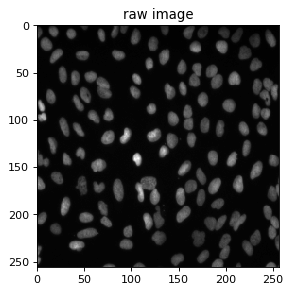

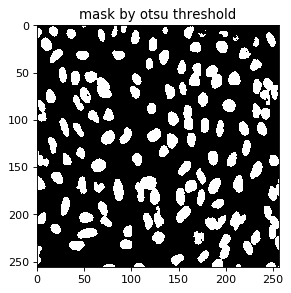

(256, 256)


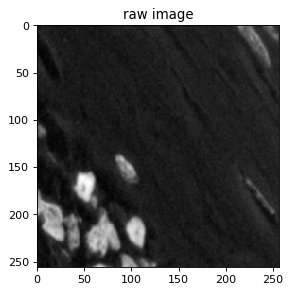

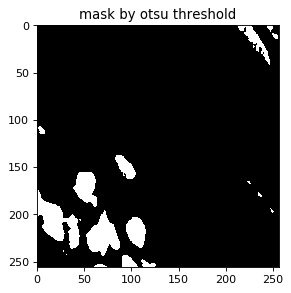

(256, 256)


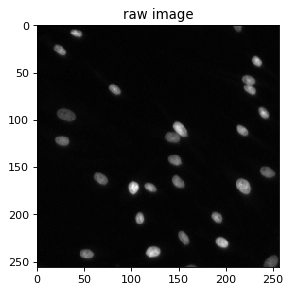

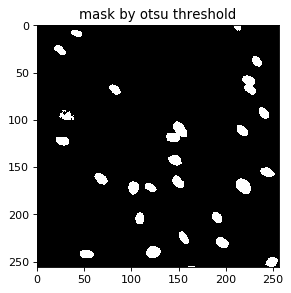

(256, 256)


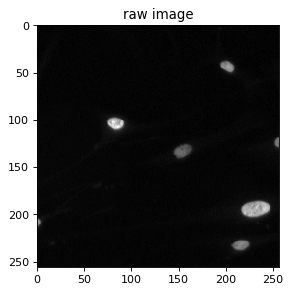

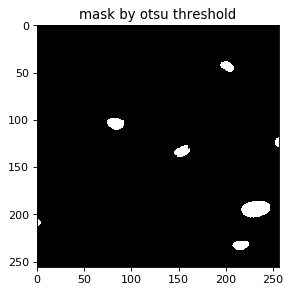

(256, 256)


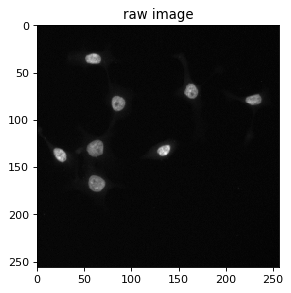

KeyboardInterrupt: 

In [4]:
num_img = images.shape[0]
for i in range(num_img):
    # rgb -> grayscale
    img = images[i]
    img = np.mean(img, axis=2)
#     print(img.shape)
    
    # make sure the brighter region are the foreground
    if np.mean(img) > 100:
        img = 255 - img
    
    # otsu filter to get binary mask
    img = sitk.GetImageFromArray(img)
    otsuFilter = sitk.OtsuThresholdImageFilter()
    otsuFilter.SetInsideValue(0)
    otsuFilter.SetOutsideValue(1)
    mask = otsuFilter.Execute(img)
    myshow(img, 'raw image')
    myshow(mask, 'mask by otsu threshold')